## Mobile Payment Fraud Detection 

Given *synthetic data about mobile transactions*, let's try to detect the presence of **fraudulent activity.**

We will use a multi-input TensorFlow Neural Network to make our predictions. 

Data source: https://www.kaggle.com/datasets/ealaxi/paysim1

### Getting Started 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2024-11-14 10:28:59.062721: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv", nrows=50000)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,9,PAYMENT,1322.91,C1402545110,1208457.61,1207134.71,M578074960,0.0,0.0,0,0
49996,9,PAYMENT,6900.48,C517372485,1207134.71,1200234.22,M1854114037,0.0,0.0,0,0
49997,9,PAYMENT,17399.12,C1948160352,1200234.22,1182835.10,M1940330634,0.0,0.0,0,0
49998,9,PAYMENT,5485.20,C1586381033,1182835.10,1177349.90,M741912557,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
df = df.drop(['step', 'isFlaggedFraud', 'nameOrig'], axis=1)
df

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,181.00,0.00,C553264065,0.0,0.0,1
3,CASH_OUT,181.00,181.00,0.00,C38997010,21182.0,0.0,1
4,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.0,0.0,0
...,...,...,...,...,...,...,...,...
49995,PAYMENT,1322.91,1208457.61,1207134.71,M578074960,0.0,0.0,0
49996,PAYMENT,6900.48,1207134.71,1200234.22,M1854114037,0.0,0.0,0
49997,PAYMENT,17399.12,1200234.22,1182835.10,M1940330634,0.0,0.0,0
49998,PAYMENT,5485.20,1182835.10,1177349.90,M741912557,0.0,0.0,0


In [6]:
y = df['isFraud'].copy()
X = df.drop('isFraud', axis=1).copy()

In [7]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.0,0.0
1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.0,0.0
2,TRANSFER,181.00,181.00,0.00,C553264065,0.0,0.0
3,CASH_OUT,181.00,181.00,0.00,C38997010,21182.0,0.0
4,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.0,0.0
...,...,...,...,...,...,...,...
49995,PAYMENT,1322.91,1208457.61,1207134.71,M578074960,0.0,0.0
49996,PAYMENT,6900.48,1207134.71,1200234.22,M1854114037,0.0,0.0
49997,PAYMENT,17399.12,1200234.22,1182835.10,M1940330634,0.0,0.0
49998,PAYMENT,5485.20,1182835.10,1177349.90,M741912557,0.0,0.0


In [8]:
y

0        0
1        0
2        1
3        1
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: isFraud, Length: 50000, dtype: int64

In [9]:
X['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
dummies = pd.get_dummies(X['type'], dtype=int, prefix='tp')
X = pd.concat([X, dummies], axis=1)
X = X.drop('type', axis=1)
X

,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,9839.64,170136.00,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,1864.28,21249.00,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,181.00,181.00,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,181.00,181.00,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,11668.14,41554.00,29885.86,M1230701703,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,1322.91,1208457.61,1207134.71,M578074960,0.0,0.0,0,0,0,1,0
49996,6900.48,1207134.71,1200234.22,M1854114037,0.0,0.0,0,0,0,1,0
49997,17399.12,1200234.22,1182835.10,M1940330634,0.0,0.0,0,0,0,1,0
49998,5485.20,1182835.10,1177349.90,M741912557,0.0,0.0,0,0,0,1,0


In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [12]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
38094,662193.61,0.00,0.00,C1219273867,7676300.88,8618696.68,0,1,0,0,0
40624,110721.83,6660798.09,6771519.93,C303888116,423886.70,382665.98,1,0,0,0,0
49425,15598.14,10272.00,0.00,M1046870740,0.00,0.00,0,0,0,1,0
35734,32284.61,100861.00,68576.39,M1546597819,0.00,0.00,0,0,0,1,0
41708,1151.48,157408.10,158559.58,C1499383906,812829.61,1056392.49,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11284,7922.15,44791.98,36869.82,M865012080,0.00,0.00,0,0,0,1,0
44732,14258.92,42671.00,28412.08,M1563489788,0.00,0.00,0,0,0,1,0
38158,274558.41,0.00,0.00,C1730752455,4569460.29,4677041.38,0,1,0,0,0
860,96178.80,0.00,0.00,C1749186397,111973.96,277515.05,0,1,0,0,0


In [13]:
# Create a tokenizer and fit it to the customer data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train['nameDest'])

In [14]:
print("Total # of customers:", len(tokenizer.word_index))

Total # of customers: 21072


In [15]:
# {column: len(X[column].unique()) for column in X.columns}

In [16]:
tokenizer.word_index

{'c1286084959': 1,
 'c977993101': 2,
 'c1590550415': 3,
 'c985934102': 4,
 'c1360767589': 5,
 'c1782113663': 6,
 'c2083562754': 7,
 'c1789550256': 8,
 'c665576141': 9,
 'c248609774': 10,
 'c1023714065': 11,
 'c97730845': 12,
 'c451111351': 13,
 'c1816757085': 14,
 'c1899073220': 15,
 'c667346055': 16,
 'c1262822392': 17,
 'c932583850': 18,
 'c306206744': 19,
 'c33524623': 20,
 'c909295153': 21,
 'c1234776885': 22,
 'c716083600': 23,
 'c11003494': 24,
 'c1916720513': 25,
 'c481402298': 26,
 'c453211571': 27,
 'c1504109395': 28,
 'c1850180796': 29,
 'c1303868418': 30,
 'c1883840933': 31,
 'c803116137': 32,
 'c392292416': 33,
 'c998351292': 34,
 'c564160838': 35,
 'c662736689': 36,
 'c1721246982': 37,
 'c1674899618': 38,
 'c1531333864': 39,
 'c991363637': 40,
 'c1870252780': 41,
 'c214774813': 42,
 'c1255024717': 43,
 'c1060041730': 44,
 'c766681183': 45,
 'c1297685781': 46,
 'c991505714': 47,
 'c40075281': 48,
 'c997608398': 49,
 'c1446521801': 50,
 'c769342184': 51,
 'c801142660': 52,
 

In [17]:
# Create tokenized customer lists
customers_train = tokenizer.texts_to_sequences(X_train['nameDest'])
customers_test = tokenizer.texts_to_sequences(X_test['nameDest'])

In [18]:
customers_train

[[144],
 [2369],
 [3460],
 [3461],
 [1008],
 [173],
 [1298],
 [280],
 [1299],
 [3462],
 [3463],
 [3464],
 [37],
 [3465],
 [86],
 [3466],
 [3467],
 [281],
 [3468],
 [3469],
 [3470],
 [174],
 [1300],
 [3471],
 [1718],
 [3472],
 [1301],
 [57],
 [3473],
 [352],
 [10],
 [1719],
 [3474],
 [3475],
 [353],
 [1720],
 [3476],
 [282],
 [354],
 [3477],
 [3478],
 [3479],
 [218],
 [3480],
 [175],
 [3481],
 [3482],
 [99],
 [3483],
 [3484],
 [79],
 [3485],
 [116],
 [3486],
 [3487],
 [3488],
 [3489],
 [3490],
 [2370],
 [3491],
 [355],
 [2371],
 [784],
 [3492],
 [3493],
 [3494],
 [785],
 [3495],
 [283],
 [3496],
 [3497],
 [3498],
 [3499],
 [3500],
 [3501],
 [450],
 [3502],
 [2372],
 [3503],
 [1302],
 [3504],
 [3505],
 [3506],
 [2373],
 [1303],
 [3507],
 [3508],
 [1],
 [1304],
 [38],
 [282],
 [3509],
 [3510],
 [1721],
 [3511],
 [3512],
 [3513],
 [3514],
 [3515],
 [3516],
 [3517],
 [219],
 [3518],
 [2374],
 [3519],
 [786],
 [284],
 [24],
 [3520],
 [117],
 [3521],
 [3522],
 [285],
 [451],
 [1722],
 [220],


In [19]:
customers_test

[[],
 [],
 [5],
 [488],
 [21029],
 [],
 [],
 [16170],
 [],
 [3311],
 [3375],
 [3253],
 [],
 [],
 [723],
 [],
 [3336],
 [993],
 [714],
 [196],
 [],
 [],
 [169],
 [],
 [],
 [],
 [],
 [],
 [1879],
 [],
 [],
 [],
 [],
 [],
 [866],
 [673],
 [2286],
 [1173],
 [1474],
 [],
 [],
 [857],
 [1567],
 [420],
 [857],
 [],
 [],
 [325],
 [906],
 [],
 [],
 [],
 [],
 [2040],
 [301],
 [],
 [1996],
 [20271],
 [],
 [],
 [],
 [],
 [211],
 [],
 [7371],
 [459],
 [],
 [2383],
 [14897],
 [],
 [],
 [335],
 [1853],
 [],
 [1665],
 [],
 [10169],
 [],
 [556],
 [],
 [],
 [899],
 [],
 [479],
 [8296],
 [2378],
 [],
 [],
 [],
 [70],
 [],
 [],
 [8224],
 [19],
 [972],
 [15],
 [190],
 [],
 [],
 [302],
 [],
 [874],
 [490],
 [1794],
 [1760],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [951],
 [],
 [11595],
 [1186],
 [],
 [],
 [1798],
 [],
 [],
 [],
 [2171],
 [1147],
 [945],
 [],
 [436],
 [1181],
 [212],
 [1799],
 [],
 [],
 [],
 [2360],
 [],
 [],
 [1738],
 [9048],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [1769],
 [],
 [],
 [],
 [],
 

In [20]:
# Pad Sequences
customers_train = tf.keras.preprocessing.sequence.pad_sequences(customers_train, maxlen=1)
customers_test = tf.keras.preprocessing.sequence.pad_sequences(customers_test, maxlen=1)

In [21]:
customers_train

array([[  144],
       [ 2369],
       [ 3460],
       ...,
       [  141],
       [  147],
       [21072]], dtype=int32)

In [22]:
customers_test

array([[   0],
       [   0],
       [   5],
       ...,
       [2865],
       [ 553],
       [   0]], dtype=int32)

In [23]:
# Drop nameDest column
X_train = X_train.drop('nameDest', axis=1)
X_test = X_test.drop('nameDest', axis=1)

In [24]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
38094,662193.61,0.00,0.00,7676300.88,8618696.68,0,1,0,0,0
40624,110721.83,6660798.09,6771519.93,423886.70,382665.98,1,0,0,0,0
49425,15598.14,10272.00,0.00,0.00,0.00,0,0,0,1,0
35734,32284.61,100861.00,68576.39,0.00,0.00,0,0,0,1,0
41708,1151.48,157408.10,158559.58,812829.61,1056392.49,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11284,7922.15,44791.98,36869.82,0.00,0.00,0,0,0,1,0
44732,14258.92,42671.00,28412.08,0.00,0.00,0,0,0,1,0
38158,274558.41,0.00,0.00,4569460.29,4677041.38,0,1,0,0,0
860,96178.80,0.00,0.00,111973.96,277515.05,0,1,0,0,0


In [25]:
# Scale X with a Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [26]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,1.547713,-0.329383,-0.329974,2.857901,2.595385,-0.464935,1.615698,-0.115021,-0.882199,-0.323186
1,-0.141650,2.703596,2.703047,-0.172066,-0.269197,2.150838,-0.618927,-0.115021,-0.882199,-0.323186
2,-0.433049,-0.324705,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186
3,-0.381932,-0.283456,-0.299258,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186
4,-0.477305,-0.257707,-0.258954,-0.009571,-0.034868,2.150838,-0.618927,-0.115021,-0.882199,-0.323186
...,...,...,...,...,...,...,...,...,...,...
34995,-0.456564,-0.308987,-0.313460,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186
34996,-0.437152,-0.309953,-0.317248,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186
34997,0.360242,-0.329383,-0.329974,1.559902,1.224434,-0.464935,1.615698,-0.115021,-0.882199,-0.323186
34998,-0.186201,-0.329383,-0.329974,-0.302379,-0.305770,-0.464935,1.615698,-0.115021,-0.882199,-0.323186


In [27]:
X_train.mean() # very close to 0

amount            4.060244e-17
oldbalanceOrg     9.013742e-17
newbalanceOrig    1.563194e-17
oldbalanceDest    2.446297e-17
newbalanceDest    2.375243e-17
tp_CASH_IN        3.430906e-17
tp_CASH_OUT      -1.751995e-16
tp_DEBIT          2.659460e-17
tp_PAYMENT        4.080545e-17
tp_TRANSFER       7.552054e-17
dtype: float64

In [28]:
X_train.var()  # Very close to 1

amount            1.000029
oldbalanceOrg     1.000029
newbalanceOrig    1.000029
oldbalanceDest    1.000029
newbalanceDest    1.000029
tp_CASH_IN        1.000029
tp_CASH_OUT       1.000029
tp_DEBIT          1.000029
tp_PAYMENT        1.000029
tp_TRANSFER       1.000029
dtype: float64

### Handling Class Imbalance

In [87]:
train_df = pd.concat([X_train, pd.Series(np.squeeze(customers_train), name='customer'), y_train.reset_index(drop=True)], axis=1)

In [88]:
train_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
0,1.547713,-0.329383,-0.329974,2.857901,2.595385,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,144,0
1,-0.141650,2.703596,2.703047,-0.172066,-0.269197,2.150838,-0.618927,-0.115021,-0.882199,-0.323186,2369,0
2,-0.433049,-0.324705,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186,3460,0
3,-0.381932,-0.283456,-0.299258,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186,3461,0
4,-0.477305,-0.257707,-0.258954,-0.009571,-0.034868,2.150838,-0.618927,-0.115021,-0.882199,-0.323186,1008,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34995,-0.456564,-0.308987,-0.313460,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186,21070,0
34996,-0.437152,-0.309953,-0.317248,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186,21071,0
34997,0.360242,-0.329383,-0.329974,1.559902,1.224434,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,141,0
34998,-0.186201,-0.329383,-0.329974,-0.302379,-0.305770,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,147,0


In [89]:
train_df['isFraud'].value_counts()

isFraud
0    34931
1       69
Name: count, dtype: int64

In [90]:
print("Number of examples to sample:", 34931-69)

Number of examples to sample: 34862


In [91]:
oversampled_data = train_df.query('isFraud == 1').sample(34862, replace=True, random_state=42)
oversampled_data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
23799,-0.112999,-0.274707,-0.329974,-0.349161,-0.360530,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,800,1
8419,-0.446191,-0.324234,-0.329974,-0.349161,-0.297063,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,2395,1
29529,0.039763,-0.252000,-0.329974,-0.349161,-0.343185,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,163,1
11828,-0.404029,-0.317966,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,-0.882199,3.094191,2647,1
12559,-0.294804,-0.301731,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,-0.882199,3.094191,1116,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12821,0.593510,-0.169690,-0.329974,0.024659,0.221692,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,3006,1
13232,-0.428001,-0.321530,-0.329974,-0.349161,-0.366914,-0.464935,-0.618927,-0.115021,-0.882199,3.094191,1733,1
23633,7.299821,0.827154,-0.329974,-0.349161,-0.311413,-0.464935,-0.618927,-0.115021,-0.882199,3.094191,15339,1
19962,-0.438842,-0.323141,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,-0.882199,3.094191,800,1


In [92]:
train_df = pd.concat([train_df, oversampled_data], axis=0).sample(frac=1.0, random_state=42).reset_index(drop=True)
train_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
0,-0.467138,-0.328537,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186,16883,0
1,0.239791,-0.222267,-0.329974,-0.349161,-0.320474,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,561,1
2,-0.373419,-0.313417,-0.329974,-0.336151,-0.399667,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,382,1
3,-0.441733,-0.325516,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186,18915,0
4,16.245189,2.156817,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,-0.882199,3.094191,20456,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69857,2.470825,0.109359,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,-0.882199,3.094191,7707,1
69858,-0.209886,1.375229,1.386405,-0.048950,-0.032547,2.150838,-0.618927,-0.115021,-0.882199,-0.323186,1487,0
69859,-0.348825,-0.309761,-0.329974,-0.073153,0.000703,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,567,1
69860,-0.282296,-0.329383,-0.329974,-0.306095,-0.040624,-0.464935,1.615698,-0.115021,-0.882199,-0.323186,1767,0


In [93]:
train_df['isFraud'].value_counts()

isFraud
0    34931
1    34931
Name: count, dtype: int64

In [94]:
customers_train = train_df['customer'].copy()
y_train = train_df['isFraud'].copy()
X_train = train_df.drop(['customer', 'isFraud'], axis=1).copy()

In [95]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,-0.467138,-0.328537,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186
1,0.239791,-0.222267,-0.329974,-0.349161,-0.320474,-0.464935,1.615698,-0.115021,-0.882199,-0.323186
2,-0.373419,-0.313417,-0.329974,-0.336151,-0.399667,-0.464935,1.615698,-0.115021,-0.882199,-0.323186
3,-0.441733,-0.325516,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,1.133531,-0.323186
4,16.245189,2.156817,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,-0.882199,3.094191
...,...,...,...,...,...,...,...,...,...,...
69857,2.470825,0.109359,-0.329974,-0.349161,-0.402293,-0.464935,-0.618927,-0.115021,-0.882199,3.094191
69858,-0.209886,1.375229,1.386405,-0.048950,-0.032547,2.150838,-0.618927,-0.115021,-0.882199,-0.323186
69859,-0.348825,-0.309761,-0.329974,-0.073153,0.000703,-0.464935,1.615698,-0.115021,-0.882199,-0.323186
69860,-0.282296,-0.329383,-0.329974,-0.306095,-0.040624,-0.464935,1.615698,-0.115021,-0.882199,-0.323186


In [96]:
customers_train

0        16883
1          561
2          382
3        18915
4        20456
         ...  
69857     7707
69858     1487
69859      567
69860     1767
69861    11357
Name: customer, Length: 69862, dtype: int32

In [97]:
y_train

0        0
1        1
2        1
3        0
4        1
        ..
69857    1
69858    0
69859    1
69860    0
69861    0
Name: isFraud, Length: 69862, dtype: int64

In [80]:
# train_df.sample(100, replace=True)

### Modeling

In [128]:
X_inputs = tf.keras.Input(shape=(10, ), name='X_input')
customer_inputs = tf.keras.Input(shape=(1, ), name='customer_input')

# X
X_dense1 = tf.keras.layers.Dense(64, activation='relu', name='X_dense1')(X_inputs)
X_dense2 = tf.keras.layers.Dense(64, activation='relu', name='X_dense2')(X_dense1)

# Customers
customer_embedding = tf.keras.layers.Embedding(
    input_dim = 21073, # len(tokenizer.word_index) + 1
    output_dim = 64,
    input_length = 1,
    name='customer_embedding'
)(customer_inputs)
customer_flatten = tf.keras.layers.Flatten(name='customer_flatten')(customer_embedding)

In [129]:
customer_embedding.shape

TensorShape([None, 1, 64])

In [130]:
customer_inputs.shape

TensorShape([None, 1])

In [131]:
customer_flatten.shape

TensorShape([None, 64])

In [132]:
# Concatenate
concat = tf.keras.layers.concatenate([X_dense2, customer_flatten], name='concatenate')

In [133]:
# Output
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(concat)

In [134]:
# Model
model = tf.keras.Model(inputs=[X_inputs, customer_inputs], outputs=outputs)

In [135]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_input (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 customer_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 X_dense1 (Dense)               (None, 64)           704         ['X_input[0][0]']                
                                                                                                  
 customer_embedding (Embedding)  (None, 1, 64)       1348672     ['customer_input[0][0]']         
                                                                                            

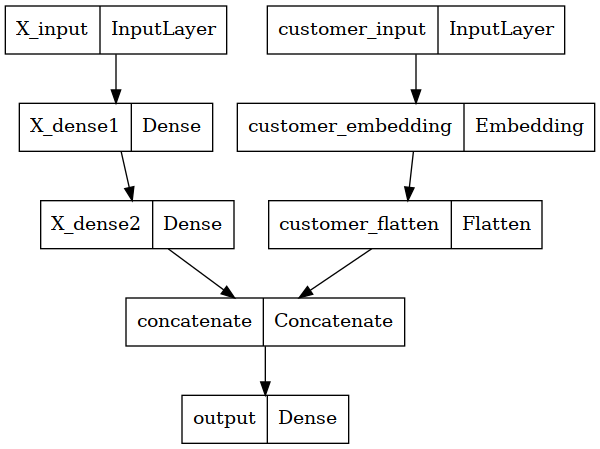

In [136]:
tf.keras.utils.plot_model(model)

In [137]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

### Training

In [139]:
history = model.fit(
    [X_train, customers_train],
    y_train,
    validation_split=0.2,
    class_weight={
        0: 0.25,
        1: 4.0
    },
    batch_size=32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
1747/1747 [==============================] - 54s 30ms/step - loss: 0.0618 - accuracy: 0.9457 - auc: 0.9964 - val_loss: 0.0130 - val_accuracy: 0.9980 - val_auc: 0.9990
Epoch 2/10
1747/1747 [==============================] - 53s 30ms/step - loss: 0.0032 - accuracy: 0.9983 - auc: 0.9990 - val_loss: 0.0102 - val_accuracy: 0.9982 - val_auc: 0.9992
Epoch 3/10
1747/1747 [==============================] - 52s 30ms/step - loss: 0.0026 - accuracy: 0.9985 - auc: 0.9992 - val_loss: 0.0096 - val_accuracy: 0.9980 - val_auc: 0.9994
Epoch 4/10
1747/1747 [==============================] - 54s 31ms/step - loss: 0.0024 - accuracy: 0.9988 - auc: 0.9993 - val_loss: 0.0074 - val_accuracy: 0.9989 - val_auc: 0.9994
Epoch 5/10
1747/1747 [==============================] - 54s 31ms/step - loss: 0.0020 - accuracy: 0.9989 - auc: 0.9994 - val_loss: 0.0073 - val_accuracy: 0.9990 - val_auc: 0.9994
Epoch 6/10
1747/1747 [==============================] - 56s 32ms/step - loss: 0.0018 - accuracy: 0.9991 - auc:

### Results

In [140]:
results = model.evaluate([X_test, customers_test], y_test, verbose=0)
print("Test Accuracy: {:.3f}%".format(results[1]*100))
print("     Test AUC: {:.3f}%".format(results[2]*100))

Test Accuracy: 99.580%
     Test AUC: 72.106%


In [141]:
y_true = np.array(y_test)

y_pred = np.squeeze(model.predict([X_test, customers_test]))

469/469 [==============================] - 1s 2ms/step


In [142]:
y_pred

array([2.7662784e-07, 2.7193684e-07, 3.1101125e-11, ..., 5.7416653e-15,
       5.1975559e-07, 2.2995734e-07], dtype=float32)

In [143]:
y_pred = (y_pred >= 0.5).astype(np.int)

/tmp/ipykernel_12089/3221947814.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = (y_pred >= 0.5).astype(np.int)


In [144]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
y_true

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=['Not Fraud', 'Fraud'])

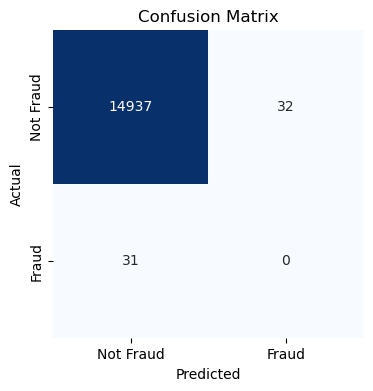

In [147]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(2) + 0.5, ['Not Fraud', 'Fraud'])
plt.yticks(np.arange(2) + 0.5, ['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [148]:
print("Classification Report: \n----------------------\n", clr)

Classification Report: 
----------------------
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     14969
       Fraud       0.00      0.00      0.00        31

    accuracy                           1.00     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       1.00      1.00      1.00     15000

